In [1117]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib
import scipy.io
from Crowd_read import *
import scikitplot as skplt
import pandas as pd
from sklearn.metrics import roc_curve, auc

In [1034]:
def feature_array_smoothed(feature):
    df = pd.DataFrame({"B": np.squeeze(feature)})

    b = df.rolling(window=20).mean()
    df2 = pd.DataFrame({'D': np.squeeze(b)})
    z = df2.rolling(window=20).mean()
    x = z.dropna()

    x_array = (x.values).T
    padding_data = x_array[0, 0]
    padding_list = [padding_data]*38
    padding_array = np.array(padding_list)
    padding_array = padding_array.reshape(1, padding_array.shape[0])
    x_array_padded = np.append(padding_array, x_array)
    x_array_padded= x_array_padded.reshape(1, x_array_padded.shape[0])
    x_array_padded_squeezed = np.squeeze(x_array_padded)
    return x_array_padded

In [1035]:
def handleEndScene(abnormal_point, fearture_array, actual_list):
    dimension = fearture_array.shape[1]
    fearture_array_rounded = np.round(fearture_array, 3)
    finish_point = 0
    
    for j in range(abnormal_point+1,dimension):
        if fearture_array_rounded[0, j] \
                - fearture_array_rounded[0, abnormal_point-1] <= 0.002:
            finish_point = j
            print("{} is {}".format("finish_point", finish_point))
            break
    actual_handled_array = np.array(actual_list)
    if finish_point:
        actual_handled_array[finish_point+1 : ] = 0
    
    return actual_handled_array
        
        

In [1036]:
def createlistzeros(n):
    a = [0]*n
    return a

In [1037]:
def createlistones(n):
    a = [1]*n
    return a

In [1043]:
def modified_y_test(feature_smoothed, abnormal_point):
    normal_array = createlistzeros(abnormal_point)
    abnormal_array = createlistones(feature_smoothed.shape[1] - abnormal_point)
    A_list = normal_array + abnormal_array
    A__handled_array = handleEndScene(abnormal_point, feature_smoothed, A_list)
    y_grass = A__handled_array.reshape((1, A__handled_array.shape[0]))
    print(y_grass)
    return y_grass

In [1063]:
def feature_normalization(feature_index_smoothed):
    feature_index_normalized = 100 * (feature_index_smoothed 
                                      - np.min(feature_index_smoothed))/\
                               (np.max(feature_index_smoothed) - np.min(feature_index_smoothed))
    
    return feature_index_normalized

In [1078]:
feature01_smoothed = feature_array_smoothed(feature01)
feature02_smoothed = feature_array_smoothed(feature02)
feature06_smoothed = feature_array_smoothed(feature06)


In [1079]:
abnormal_point_scene_01 = 489
y_grass_01 = modified_y_test(feature01_smoothed, abnormal_point_scene_01)
abnormal_point_scene_06 = 320
y_grass_06 = modified_y_test(feature06_smoothed, abnormal_point_scene_06)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 

In [1080]:
abnormal_point_scene_02 = 689
y_grass_02 = modified_y_test(feature02_smoothed, abnormal_point_scene_02)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 

In [1081]:
feature01_normalized = feature_normalization(feature01_smoothed)
feature02_normalized = feature_normalization(feature02_smoothed)
feature06_normalized = feature_normalization(feature06_smoothed)

In [1082]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [1083]:
def initializewithzeros(dim):
    w = 0
    b = 0
    
    assert (isinstance(b, float) or isinstance(b, int))
    
    return w, b


In [1084]:

def propagate(w, b, X, Y):
        
    m = X.shape[1]
    Z = w*X+b
    A = sigmoid(Z)            # compute activation
    cost = -1.0/m * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))         # compute cost
    
    dw = 1.0/m * np.dot(X, (A - Y).T)
    db = 1.0/m * np.sum(A - Y)
    
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost


In [1085]:
def optimization(w, b, X, Y, num_iterations, learning_rate, print_cost = True):
    costs = []
    for i in range(num_iterations):
        grads, cost= propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw
        b = b - learning_rate * db
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    paras = {"w" : w,
             "b" : b}
    grads = {"dw": dw,
             "db": db}
    return paras, grads, costs

In [1086]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    A = sigmoid(w*X+b)
    for i in range(A.shape[1]):
        Y_prediction[0,i] = np.rint(A[0, i])
    assert(Y_prediction.shape == (1, m))
    return Y_prediction

In [1087]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.05, print_cost= True):
    w, b =0, 0
    parameters, grads, costs = optimization(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    print(w)
    b = parameters["b"]
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_train":Y_prediction_train,
         "Y_prediction_test": Y_prediction_test, 
         "w": w, 
         "b": b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

  

In [1094]:
d = model(feature06_normalized, 
           y_grass_06, feature02_normalized, y_grass_02, num_iterations=1000, learning_rate= 0.1, print_cost= True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.150163
Cost after iteration 200: 0.086248
Cost after iteration 300: 0.065738
Cost after iteration 400: 0.054585
Cost after iteration 500: 0.047535
Cost after iteration 600: 0.042651
Cost after iteration 700: 0.039052
Cost after iteration 800: 0.036277
Cost after iteration 900: 0.034066
[[ 0.19129928]]
train accuracy: 99.4186046512 %
test accuracy: 99.1411042945 %


/Users/patrick/anaconda3/envs/python36/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning:

divide by zero encountered in log

/Users/patrick/anaconda3/envs/python36/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in multiply



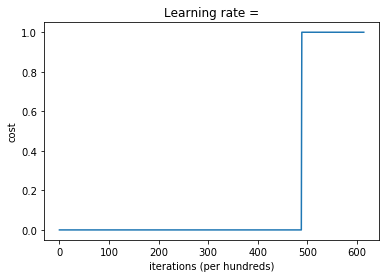

In [1089]:

#plt.scatter(x, np.squeeze(feature01_normalized))
plt.plot(np.squeeze(y_grass_01))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =")
plt.show()

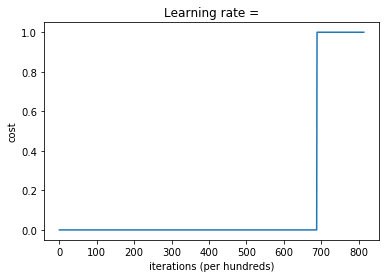

In [1090]:
plt.plot(np.squeeze(d["Y_prediction_train"]))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" )
plt.show()

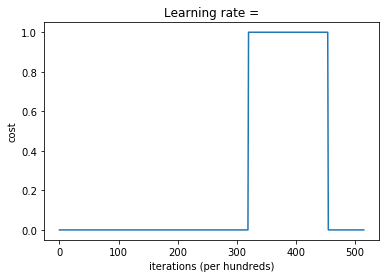

In [1091]:
plt.plot(np.squeeze(y_grass_06))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" )
plt.show()

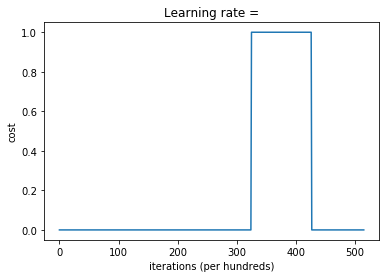

In [1092]:
plt.plot(np.squeeze(d["Y_prediction_test"]))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" )
plt.show()



IndexError: too many indices for array

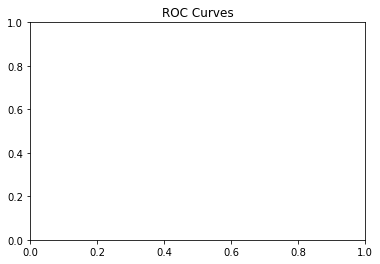

In [1118]:
y_true = np.squeeze(y_grass_02)
y_probas = np.squeeze(y_grass_02)
skplt.metrics.plot_roc(y_true, y_probas)
plt.show()

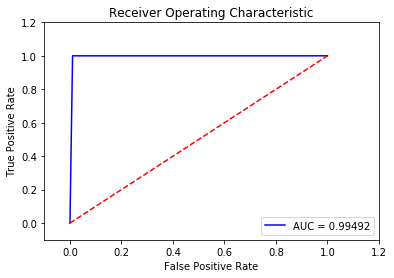

In [1120]:
predictions = np.squeeze(d["Y_prediction_test"])
actual = np.squeeze(y_grass_02)

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
            label='AUC = %0.5f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
